In [21]:
import pyart
import os
import numpy as np
from matplotlib import pyplot as plt
import netCDF4
from scipy import ndimage, signal, integrate, interpolate
import time
import copy
import platform
my_system = platform.system()
import imp
kazr_tools = imp.load_source('kazr_tools', '/Users/scollis/projects/kazr_tools/code/kazr_tools.py')

%matplotlib inline

In [2]:
single_file = '/data/radar/oli_kazr/oli_ge_example.nc'
radar = pyart.io.read(single_file)

In [40]:
toa_bg =  kazr_tools.snr_toa(radar)
all_mean =  kazr_tools.mean_snr(radar)
ns, ms, mb = kazr_tools.describe_radar_texture(radar)
nsc, msc, mbc = kazr_tools.describe_radar_corl(radar, level=.8)


In [41]:
time = netCDF4.num2date(radar.time['data'], radar.time['units'])

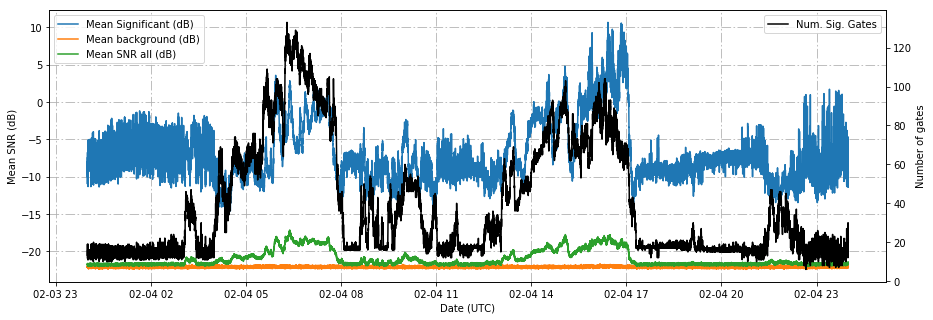

In [42]:
fig = plt.figure(figsize = [15,5])
plt.plot(time, ms, label='Mean Significant (dB)')
plt.plot(time, mb, label='Mean background (dB)')
plt.plot(time, all_mean, label='Mean SNR all (dB)')
plt.ylabel('Mean SNR (dB)')
plt.xlabel('Date (UTC)')
plt.legend(loc = 2)
ax = plt.gca()
ax3 = ax.twinx()
ax3.plot(time, ns, 'k-', label='Num. Sig. Gates')
plt.ylabel('Number of gates')

ax.grid(True)

gridlines = ax.get_xgridlines() + ax.get_ygridlines()

for line in gridlines:
    line.set_linestyle('-.')

plt.legend(loc=1)
#plt.ylim([-24,-20])


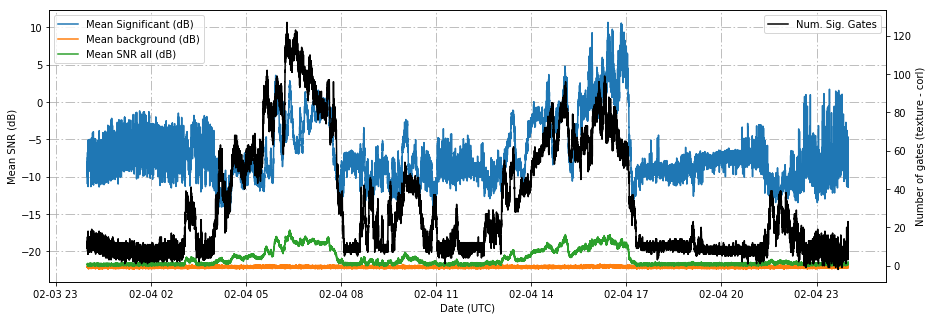

In [43]:
fig = plt.figure(figsize = [15,5])
plt.plot(time, ms, label='Mean Significant (dB)')
plt.plot(time, mb, label='Mean background (dB)')
plt.plot(time, all_mean, label='Mean SNR all (dB)')
plt.ylabel('Mean SNR (dB)')
plt.xlabel('Date (UTC)')
plt.legend(loc = 2)
ax = plt.gca()
ax3 = ax.twinx()
ax3.plot(time, ns-nsc, 'k-', label='Num. Sig. Gates')
plt.ylabel('Number of gates (texture - corl)')

ax.grid(True)

gridlines = ax.get_xgridlines() + ax.get_ygridlines()

for line in gridlines:
    line.set_linestyle('-.')

plt.legend(loc=1)
#plt.ylim([-24,-20])


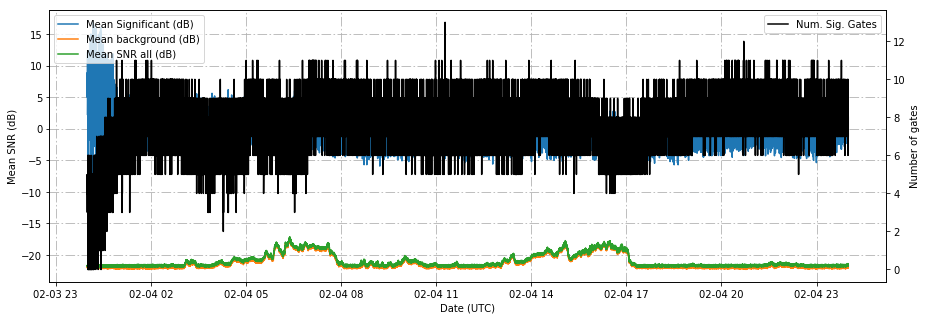

In [44]:
fig = plt.figure(figsize = [15,5])
plt.plot(time, msc, label='Mean Significant (dB)')
plt.plot(time, mbc, label='Mean background (dB)')
plt.plot(time, all_mean, label='Mean SNR all (dB)')
plt.ylabel('Mean SNR (dB)')
plt.xlabel('Date (UTC)')
plt.legend(loc = 2)
ax = plt.gca()
ax3 = ax.twinx()
ax3.plot(time, nsc, 'k-', label='Num. Sig. Gates')
plt.ylabel('Number of gates')

ax.grid(True)

gridlines = ax.get_xgridlines() + ax.get_ygridlines()

for line in gridlines:
    line.set_linestyle('-.')

plt.legend(loc=1)
#plt.ylim([-24,-20])


(736364.0000119054, 736364.9999967002)

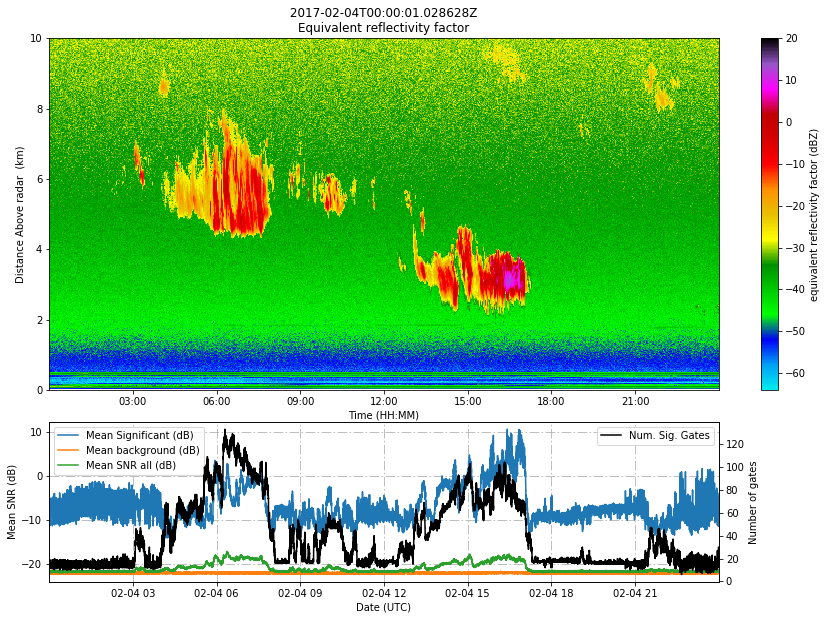

In [32]:
my_display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize = [15,10])
ax1 = plt.subplot2grid((3,1), (0,0), rowspan = 2)
ax2 = plt.subplot2grid((3,1), (2,0))
my_display.plot_vpt('reflectivity', vmin=-64, 
                    vmax=20, time_axis_flag=True,
                   ax = ax1)
ax1.set_ylim([0,10.0])
ax2.plot(time, ms, label='Mean Significant (dB)')
ax2.plot(time, mb, label='Mean background (dB)')
ax2.plot(time, all_mean, label='Mean SNR all (dB)')
plt.ylabel('Mean SNR (dB)')
plt.xlabel('Date (UTC)')
plt.legend(loc=2)
ax3 = ax2.twinx()
ax3.plot(time, ns, 'k-', label='Num. Sig. Gates')
plt.ylabel('Number of gates')
ax = ax2
ax.grid(True)

gridlines = ax.get_xgridlines() + ax.get_ygridlines()

for line in gridlines:
    line.set_linestyle('-.')

plt.legend(loc=1)
#plt.ylim([-24,-20])

pos1 = ax1.get_position() # get the original position 
pos2 = ax2.get_position()
pos3 = [pos2.x0 , pos2.y0 ,  pos1.width , pos2.height ] 
ax2.set_position(pos3) # set a new position
ax3.set_position(pos3)
ax2.set_xlim([time.min(), time.max()])
ax3.set_xlim([time.min(), time.max()])



In [7]:
radar_snr = radar.fields['snr_copol']['data']
radar_z = radar.fields['reflectivity']['data']
radar_v = radar.fields['mean_doppler_velocity']['data']
radar_t = radar.fields['velocity_texture']['data']
range_r = radar.range['data']

In [8]:
min_snr = radar_snr.min(axis=0)
min_z = radar_z.min(axis=0)
where_no_clouds_ns = ns < 50
where_no_clouds_ms = ms < -5


In [9]:
mean_snr_ns = radar_snr[where_no_clouds_ns, :].mean(axis=0)
mean_snr_ms = radar_snr[where_no_clouds_ms, :].mean(axis=0)
mean_z_ns = radar_z[where_no_clouds_ns, :].mean(axis=0)
mean_z_ms = radar_z[where_no_clouds_ms, :].mean(axis=0)
mean_v_ns = radar_v[where_no_clouds_ns, :].mean(axis=0)
mean_v_ms = radar_v[where_no_clouds_ms, :].mean(axis=0)



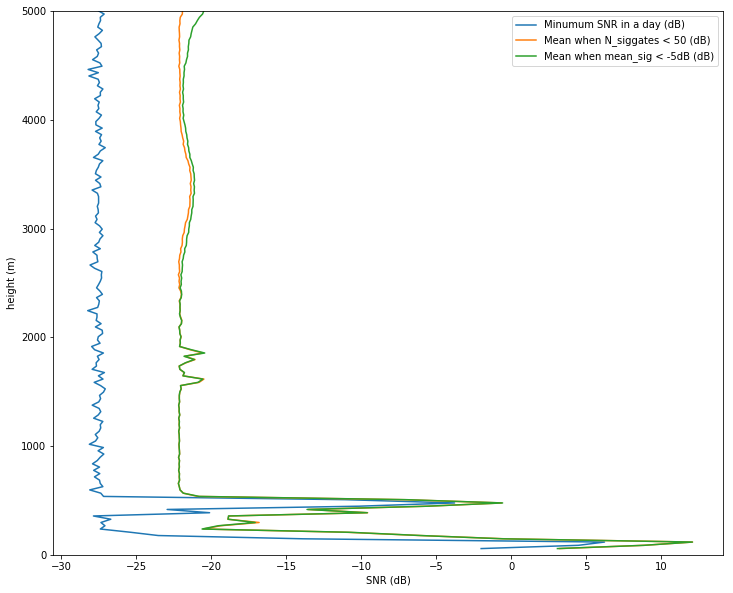

In [10]:
plt.figure(figsize=[12,10])
plt.plot(min_snr, range_r, label='Minumum SNR in a day (dB)')
plt.plot(mean_snr_ns, range_r, label='Mean when N_siggates < 50 (dB)')
plt.plot(mean_snr_ms, range_r, label='Mean when mean_sig < -5dB (dB)')
plt.ylim([0, 5000])
plt.legend()
plt.ylabel('height (m)')
plt.xlabel('SNR (dB)')
plt.savefig('../images/snr_cond_sample.png')

(736364.0000119054, 736364.9999967002)

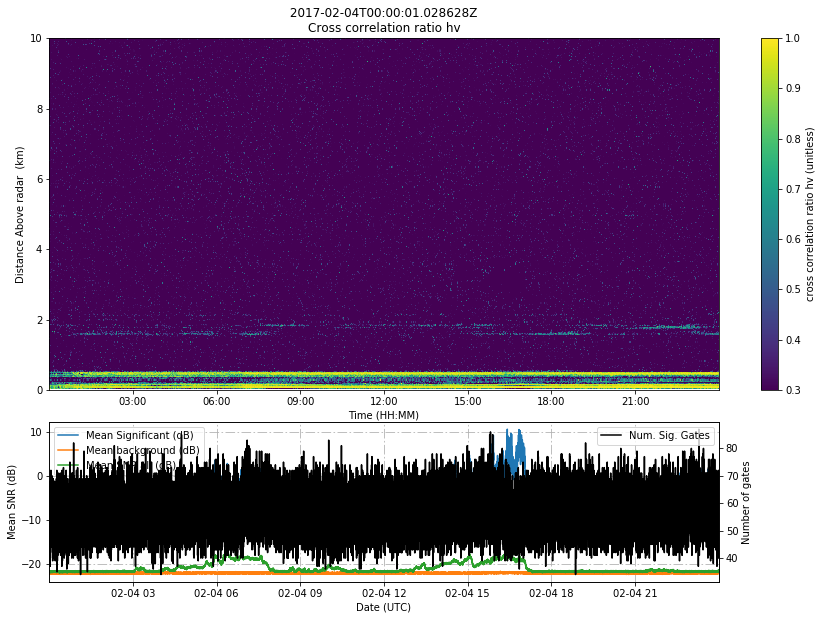

In [39]:
my_display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize = [15,10])
ax1 = plt.subplot2grid((3,1), (0,0), rowspan = 2)
ax2 = plt.subplot2grid((3,1), (2,0))
my_display.plot_vpt('co_to_crosspol_correlation_coeff', vmin=.3, 
                    vmax=1, time_axis_flag=True,
                   ax = ax1)
ax1.set_ylim([0,10.0])
ax2.plot(time, ms, label='Mean Significant (dB)')
ax2.plot(time, mb, label='Mean background (dB)')
ax2.plot(time, all_mean, label='Mean SNR all (dB)')
plt.ylabel('Mean SNR (dB)')
plt.xlabel('Date (UTC)')
plt.legend(loc=2)
ax3 = ax2.twinx()
ax3.plot(time, nsc, 'k-', label='Num. Sig. Gates')
plt.ylabel('Number of gates')
ax = ax2
ax.grid(True)

gridlines = ax.get_xgridlines() + ax.get_ygridlines()

for line in gridlines:
    line.set_linestyle('-.')

plt.legend(loc=1)
#plt.ylim([-24,-20])

pos1 = ax1.get_position() # get the original position 
pos2 = ax2.get_position()
pos3 = [pos2.x0 , pos2.y0 ,  pos1.width , pos2.height ] 
ax2.set_position(pos3) # set a new position
ax3.set_position(pos3)
ax2.set_xlim([time.min(), time.max()])
ax3.set_xlim([time.min(), time.max()])



In [11]:
print(radar.fields.keys())

dict_keys(['spectral_width', 'mean_doppler_velocity', 'snr_xpol', 'snr_copol', 'linear_depolarization_ratio', 'co_to_crosspol_correlation_coeff', 'velocity_texture', 'reflectivity'])
